In [9]:
import keras
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import plot_model

In [10]:

# load the model
model = VGG16()
print(model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

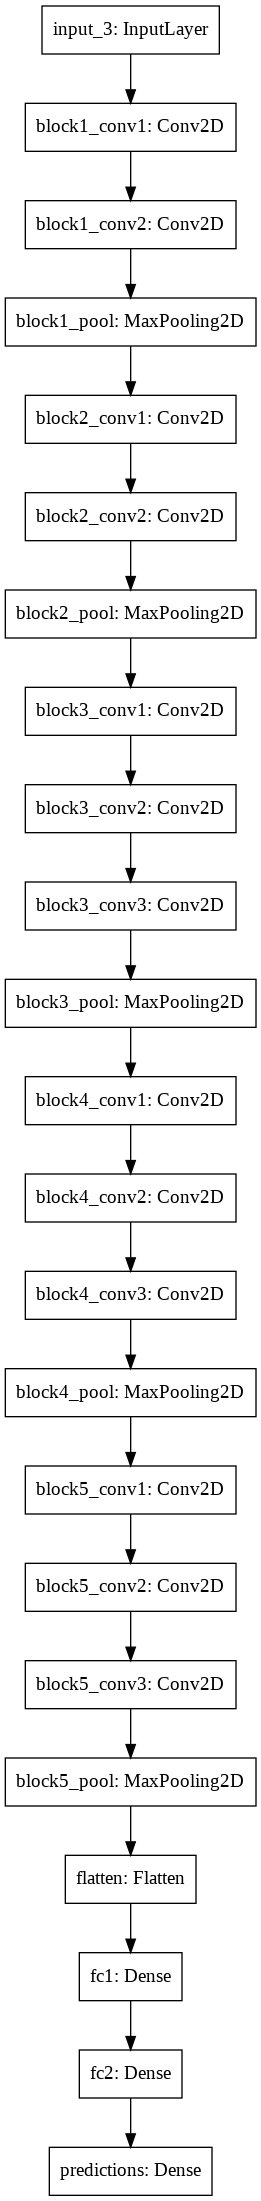

In [11]:
plot_model(model, to_file='vgg.png')

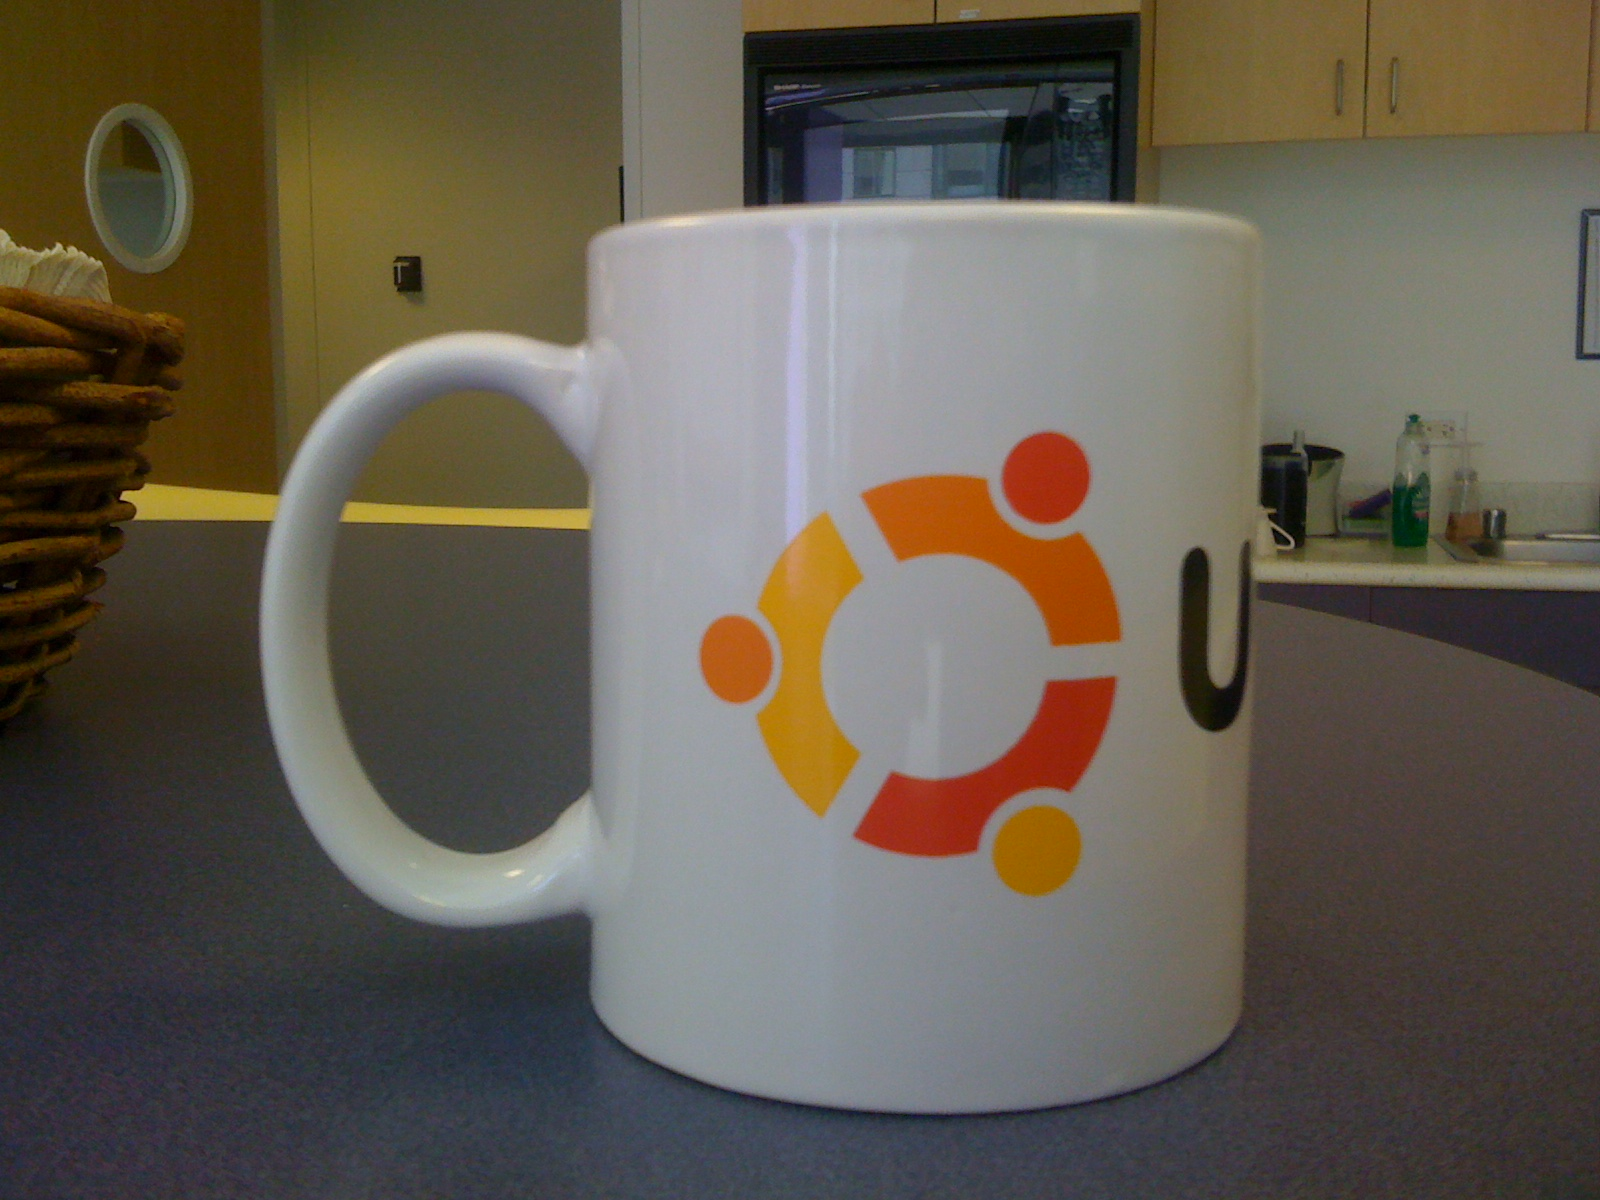

In [41]:
from IPython.display import Image
Image(filename='Mug.jpg', width=300,height=200)

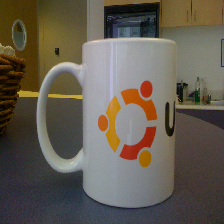

In [44]:
from keras.preprocessing.image import load_img
# load an image from file
image = load_img('Mug.jpg', target_size=(224, 224))
image


In [45]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)
image

array([[[ 67.,  54.,  10.],
        [ 71.,  59.,   0.],
        [ 68.,  53.,   0.],
        ...,
        [118.,  89.,  57.],
        [112.,  85.,  55.],
        [105.,  78.,  59.]],

       [[ 75.,  53.,   3.],
        [ 72.,  60.,   2.],
        [ 66.,  55.,   9.],
        ...,
        [115.,  89.,  52.],
        [121.,  91.,  53.],
        [ 98.,  67.,  38.]],

       [[ 65.,  55.,   0.],
        [ 75.,  57.,   9.],
        [ 73.,  57.,   5.],
        ...,
        [118.,  88.,  60.],
        [122.,  92.,  56.],
        [104.,  77.,  50.]],

       ...,

       [[ 44.,  51.,  59.],
        [ 46.,  45.,  61.],
        [ 48.,  52.,  55.],
        ...,
        [ 40.,  45.,  38.],
        [ 49.,  45.,  34.],
        [ 50.,  43.,  35.]],

       [[ 47.,  44.,  61.],
        [ 46.,  44.,  57.],
        [ 37.,  44.,  50.],
        ...,
        [ 37.,  49.,  39.],
        [ 45.,  41.,  38.],
        [ 55.,  47.,  44.]],

       [[ 41.,  41.,  49.],
        [ 40.,  44.,  53.],
        [ 46.,  

In [46]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image

array([[[[ 67.,  54.,  10.],
         [ 71.,  59.,   0.],
         [ 68.,  53.,   0.],
         ...,
         [118.,  89.,  57.],
         [112.,  85.,  55.],
         [105.,  78.,  59.]],

        [[ 75.,  53.,   3.],
         [ 72.,  60.,   2.],
         [ 66.,  55.,   9.],
         ...,
         [115.,  89.,  52.],
         [121.,  91.,  53.],
         [ 98.,  67.,  38.]],

        [[ 65.,  55.,   0.],
         [ 75.,  57.,   9.],
         [ 73.,  57.,   5.],
         ...,
         [118.,  88.,  60.],
         [122.,  92.,  56.],
         [104.,  77.,  50.]],

        ...,

        [[ 44.,  51.,  59.],
         [ 46.,  45.,  61.],
         [ 48.,  52.,  55.],
         ...,
         [ 40.,  45.,  38.],
         [ 49.,  45.,  34.],
         [ 50.,  43.,  35.]],

        [[ 47.,  44.,  61.],
         [ 46.,  44.,  57.],
         [ 37.,  44.,  50.],
         ...,
         [ 37.,  49.,  39.],
         [ 45.,  41.,  38.],
         [ 55.,  47.,  44.]],

        [[ 41.,  41.,  49.],
       

In [47]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)
image

array([[[[ -93.939    ,  -62.779    ,  -56.68     ],
         [-103.939    ,  -57.779    ,  -52.68     ],
         [-103.939    ,  -63.779    ,  -55.68     ],
         ...,
         [ -46.939003 ,  -27.779    ,   -5.6800003],
         [ -48.939003 ,  -31.779    ,  -11.68     ],
         [ -44.939003 ,  -38.779    ,  -18.68     ]],

        [[-100.939    ,  -63.779    ,  -48.68     ],
         [-101.939    ,  -56.779    ,  -51.68     ],
         [ -94.939    ,  -61.779    ,  -57.68     ],
         ...,
         [ -51.939003 ,  -27.779    ,   -8.68     ],
         [ -50.939003 ,  -25.779    ,   -2.6800003],
         [ -65.939    ,  -49.779    ,  -25.68     ]],

        [[-103.939    ,  -61.779    ,  -58.68     ],
         [ -94.939    ,  -59.779    ,  -48.68     ],
         [ -98.939    ,  -59.779    ,  -50.68     ],
         ...,
         [ -43.939003 ,  -28.779    ,   -5.6800003],
         [ -47.939003 ,  -24.779    ,   -1.6800003],
         [ -53.939003 ,  -39.779    ,  -19.68     ]],

In [48]:
# predict the probability across all output classes
yhat = model.predict(image)
print(yhat)

[[5.90587579e-09 7.35680175e-08 9.65926339e-10 3.65671160e-09
  8.75417694e-09 2.19240412e-08 2.58811506e-09 6.20674570e-08
  5.23740056e-08 7.24184730e-08 4.59873988e-08 1.67692122e-07
  1.34063271e-07 2.56901895e-08 1.03147705e-07 2.84959558e-08
  4.56037696e-08 3.86913115e-08 4.74857593e-08 8.90630716e-08
  2.58993738e-09 1.06885931e-08 1.04486428e-08 3.21148512e-08
  3.57818415e-08 7.60602248e-09 1.49130734e-08 9.73451151e-08
  1.94078478e-08 9.65216941e-07 1.13247740e-08 1.10465528e-07
  4.47107951e-08 1.11637748e-08 5.15838350e-09 3.91389365e-09
  4.66886156e-08 9.41103195e-09 2.56508237e-08 2.04195167e-08
  2.20934222e-08 1.31413271e-08 1.15130989e-08 1.49586832e-08
  3.36542136e-08 1.47005665e-07 6.57552803e-08 1.99100842e-08
  1.90920204e-08 1.12576224e-08 1.46785935e-08 2.49182701e-08
  8.77554811e-08 4.29141345e-08 3.22375939e-08 5.73504799e-08
  9.15517262e-08 2.58964583e-09 1.26251214e-08 6.82731596e-08
  4.69156234e-08 5.52917143e-08 4.13934753e-09 2.22582948e-08
  2.7403

In [49]:
from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

coffee_mug (78.71%)
